In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import tensorflow as tf

In [3]:
raw_df = pd.read_csv('insurance.csv')

In [4]:
df = raw_df.copy()

In [5]:
df['smoker'] = np.where(df['smoker'] == 'yes',1,0)
df['sex'] = np.where(df['sex'] == 'male',1,0)

In [6]:
print('unique regions :',np.sort(df['region'].unique()))
print('children range :',np.sort(df['children'].unique()))

unique regions : ['northeast' 'northwest' 'southeast' 'southwest']
children range : [0 1 2 3 4 5]


In [7]:
region_dummies = pd.get_dummies(df['region'],drop_first=True)

df = pd.concat([df,region_dummies],axis=1)
df = df[['age', 'sex', 'bmi', 'children', 'smoker','northwest', 'southeast', 'southwest', 'expenses']]

In [8]:
df.to_csv('preprocessed_insuranceDF.csv')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_size = round(df.shape[0]*0.8)
test_size = round(df.shape[0]*0.2)
print(train_size,test_size)

1070 268


In [11]:
yvalue = df.iloc[:,8:]
xvalue = df.iloc[:,0:8]

In [12]:
(xtrain,xtest,ytrain,ytest) = train_test_split(xvalue,yvalue,train_size = 0.8,shuffle = True,random_state = 10)

In [13]:
Normalizer = tf.keras.layers.Normalization(axis = -1)
Normalizer.adapt(np.array(xtrain))
Normalizer.mean.numpy()

array([[39.13926   ,  0.5065421 , 30.710749  ,  1.0869157 ,  0.2028037 ,
         0.2411215 ,  0.26822424,  0.24205603]], dtype=float32)

In [14]:
hidden_layer_size = 80
output_layer_size = 1
batch_size = 10
num_epochs=150

model = tf.keras.Sequential([
    Normalizer,
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_layer_size)
])
model.compile(optimizer = 'adam',loss='MeanAbsoluteError')
model.fit(x = xtrain,
          y=ytrain,
          batch_size = batch_size,
          epochs=num_epochs,
          verbose=False)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 80)                720       
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 7,298
Trainable params: 7,281
Non-trainable params: 17
_________________________________________________________________


In [16]:
model.evaluate(xtest,ytest,verbose=False)

2063.768798828125

In [17]:
prediction = model.predict(xtest,verbose=False)

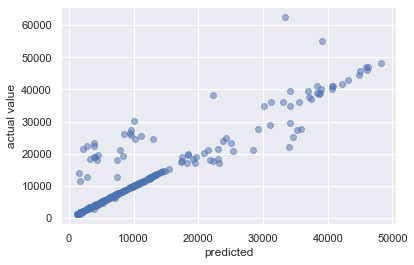

In [18]:
plt.scatter(prediction,ytest.values,alpha=0.5)
plt.xlabel('predicted')
plt.ylabel('actual value')
plt.show()

In [19]:
test_dataset = xtest
test_labels = ytest

In [20]:
test_dataset = xtest
test_labels = ytest

9/9 - 0s - loss: 2063.7688 - 16ms/epoch - 2ms/step
Testing set Mean Abs Error: 2063.77 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 1ms/step


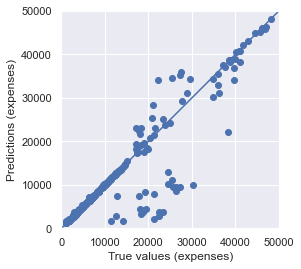

In [21]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
mae= model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

In [22]:
model.save('./model')

INFO:tensorflow:Assets written to: ./model\assets
